# Linear regression with the Wine dataset

In this task we use linear regression as a model for the `wine`
dataset, which is the dataset we used in the previous task.

First we load dataset and inspect it

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression

output_path = 'output'
os.makedirs(output_path, exist_ok=True)

wine_dataset = datasets.load_wine()

df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
df['class'] = wine_dataset['target']

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [11]:
# We only care about real-valued features. Regression is not suitable for categorical features.

# Remove all categorical features - in this case its only the "class" column
df = df.drop(columns=['class'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Regression model

As a regression model we will use a standard (multiple) linear regression model defined as:

`Y = a + b1X1 + b2X2 + ... + bnXn`

Where Y is the dependent variable, X1, X2, ..., Xn are the independent variables and a, b1, b2, ..., bn are the parameters of the model which
adjust the hyperplane to the data.

We will choose `alcohol` column as the feature we would like to predict

## Data preparation and correlation analysis

Arguably, it makes sense to pick only certain features that actually have some correlation to the target variable.
So we compute correlation between the `alcohol` and the rest and pick columns that have correlation above defined threshold

In [12]:
# Easiest way is to compute the entire matrix, the data is small enough anyway
correlation = df.corr()

correlation

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot: >

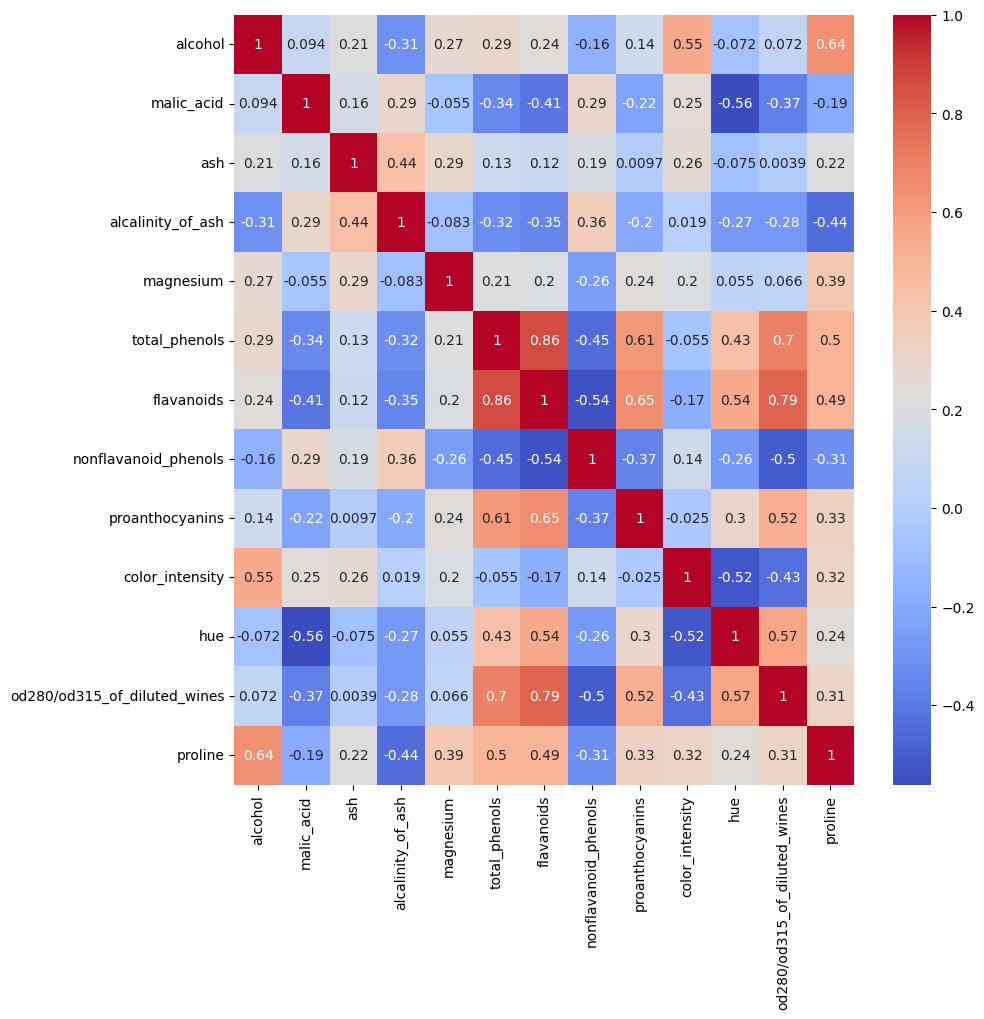

In [18]:
# This can be visualized as a heatmap
plt.figure(figsize=(10, 10))  # resize for readability
sns.heatmap(correlation, annot=True, cmap='coolwarm')

We actually only care about the row with `alcohol` column, so we extract it and convert it to absolute values

In [24]:
alcohol_corr = correlation['alcohol']

# Convert to absolute values since we are only interested in the magnitude of the correlation
alcohol_corr = alcohol_corr.abs().sort_values(ascending=False)

In [25]:
alcohol_corr


alcohol                         1.000000
proline                         0.643720
color_intensity                 0.546364
alcalinity_of_ash               0.310235
total_phenols                   0.289101
magnesium                       0.270798
flavanoids                      0.236815
ash                             0.211545
nonflavanoid_phenols            0.155929
proanthocyanins                 0.136698
malic_acid                      0.094397
od280/od315_of_diluted_wines    0.072343
hue                             0.071747
Name: alcohol, dtype: float64

In [28]:
# Define a threshold, e.g. we only want to keep features with a correlation of at least 0.10

thresholded_cols = alcohol_corr[alcohol_corr >= 0.10].index

# Extract the rows
features = df[thresholded_cols]

# Print the columns we are going to use
thresholded_cols.tolist()

['alcohol',
 'proline',
 'color_intensity',
 'alcalinity_of_ash',
 'total_phenols',
 'magnesium',
 'flavanoids',
 'ash',
 'nonflavanoid_phenols',
 'proanthocyanins']

## Model construction

Since we also want to evaluate the model we must perform train-test split to have some data for testing.

We can choose arbitrary 80-20 split. Ideally, we could also do some sort of cross-validation but we will skip it for now
because it is not part of the task and will just trust that the split is reasonably good.

In [29]:
percent_train_features = .8
train_test_seed = 42

# Sample the data
train = features.sample(frac=percent_train_features, random_state=train_test_seed)
test = features.drop(train.index)

len(train), len(test)

(142, 36)

In [32]:
x_train, y_train = train.drop(columns=['alcohol']), train['alcohol']
x_test, y_test = test.drop(columns=['alcohol']), test['alcohol']

19     13.64
45     14.21
140    12.93
30     13.73
67     12.37
       ...  
152    13.11
131    12.88
17     13.83
72     13.49
155    13.17
Name: alcohol, Length: 142, dtype: float64

In [33]:
# Construct and train the model

linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [36]:
# Show coefficients - i.e. the weight vector b
linear_regression_model.coef_

array([ 0.0011065 ,  0.14930433, -0.02583832,  0.09463875, -0.00039544,
        0.08811139,  0.15925469, -0.18127761, -0.20820231])

Compute the error as a mean squared error

In [35]:
y_pred = linear_regression_model.predict(x_test)
mse_err = np.mean((y_pred - y_test) ** 2)

mse_err

0.3690305604469304